In [ ]:
pip install -U scikit-image

In [10]:
from skimage.color import rgb2gray
from skimage import filters
from skimage import exposure
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from skimage.morphology import  disk
from skimage.filters import median
from skimage.morphology import closing, diamond, rectangle, disk, octagon
from skimage.morphology import selem
from skimage.morphology import black_tophat
from skimage.measure import label, regionprops, regionprops_table
from skimage.segmentation import expand_labels
import matplotlib.patches as mpatches
from skimage.color import label2rgb

In [11]:
im  = plt.imread("D (1).JPG")
#print(im.shape)
#fig = plt.figure(figsize = (30,7))
#plt.imshow(im)
gray = rgb2gray(im)
#print(gray.shape)
#plt.imshow(gray, cmap =  'gray')



## Applying Median Filter in order to reduce noise



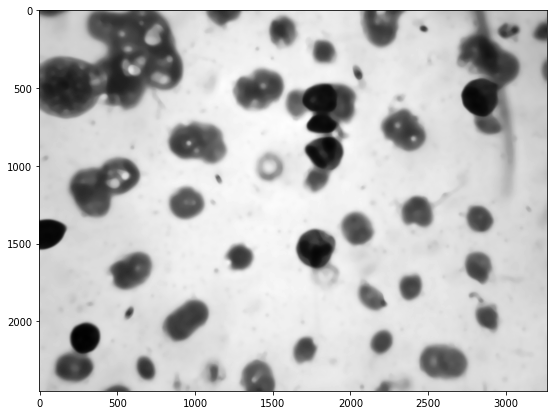

In [12]:
from skimage.morphology import  disk
from skimage.filters import median

gray_mean = median(gray, disk(20))
fig = plt.figure(figsize=(30, 7))
plt.imshow(gray_mean, cmap='gray')


## Applying Contrast Stretching

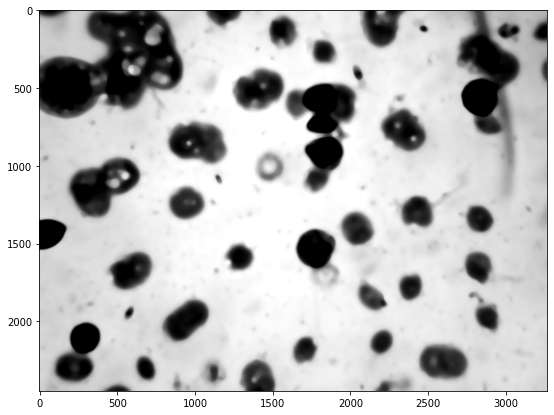

In [13]:
p2, p98 = np.percentile(gray_mean, (5, 95))
im_contrast = exposure.rescale_intensity(gray_mean,in_range=(p2, p98))
fig = plt.figure(figsize=(30, 7))
plt.imshow(im_contrast, cmap='gray')

### The ***black_tophat*** of an image is defined as i**ts morphological closing minus the original image**. This operation returns the dark spots of the image that are smaller than the structuring element.



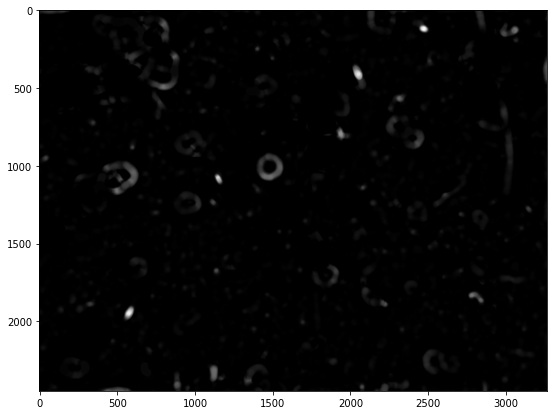

In [14]:
from skimage.morphology import closing, diamond, rectangle, disk, octagon
from skimage.morphology import selem
from skimage.morphology import black_tophat

disc = disk(30)
b_tophat25 = black_tophat(im_contrast, disc)

fig = plt.figure(figsize=(30, 7))
plt.imshow(b_tophat25, cmap=plt.cm.gray)

### Binary Mask Production utilizing threshold otsu in closed image

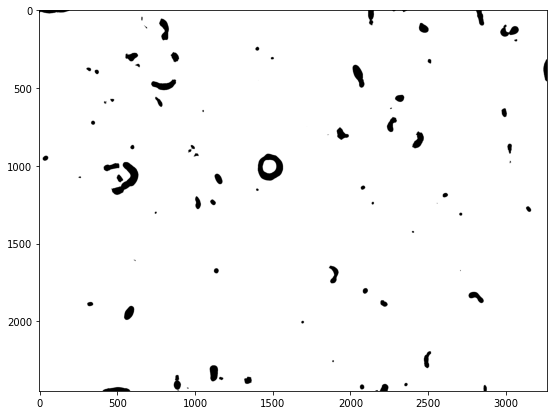

In [15]:
from skimage.filters import threshold_otsu
threshold = threshold_otsu(b_tophat25) #input value
im_contrast = (b_tophat25 < threshold) #binary is when less than trheshold
fig = plt.figure(figsize=(30, 7))
plt.imshow(im_contrast, cmap=plt.cm.gray)

### Finding Connected Components


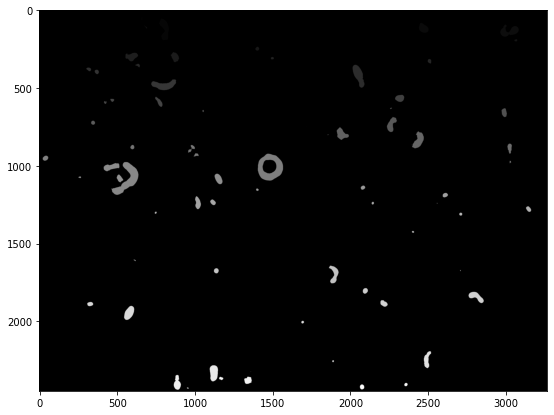

In [17]:
from skimage.measure import label, regionprops, regionprops_table
from skimage.segmentation import expand_labels
from skimage.segmentation import clear_border
from skimage.morphology import square
bw = closing(b_tophat25 > threshold, square(3))
  
cleared = clear_border(bw)
label_im = label(cleared)

fig = plt.figure(figsize=(30, 7))
plt.imshow(label_im, cmap=plt.cm.gray)
  

### Identifying possible parasites

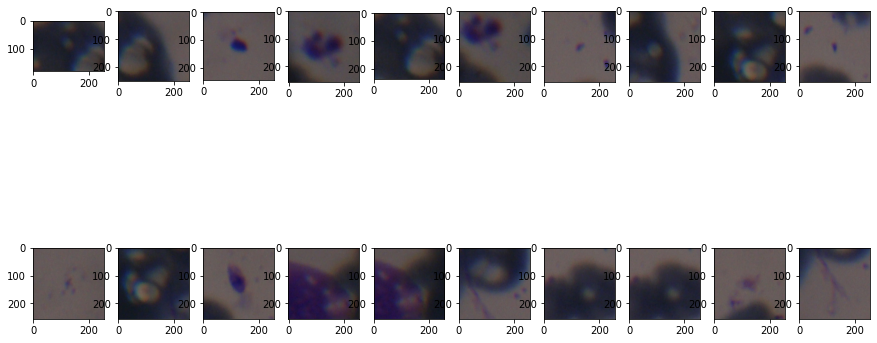

In [19]:
regions = regionprops(label_im)

j=1
fig, ax = plt.subplots(2, 10, figsize=(15,8))

for axis, region in zip(ax.flatten(), regionprops(label_im)):

    centroid1, centroid2 = region.centroid
    imin = max(0,round(centroid1) -128)
    imax = min(im.shape[0],round(centroid1) +128)
    jmin = max(0,round(centroid2)-128)
    jmax = min(im.shape[1],round(centroid2)+128)    
  
    cropped = im[imin:imax, jmin:jmax] #img 256x256 (so nao fica se ela tiver na borda)

    axis.imshow(cropped)
    j= j+1
        #axis.imshow(cropped)